In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.003 seconds.
Prefix dict has been built successfully.


美國 190
臺灣 112
進口 83
萊豬 80
美豬 58
程序 57
國家 55
開放 52
豬肉 44
萊克多巴胺 43


   Terms  Freq.
0     美國    190
1     臺灣    112
2     進口     83
3     萊豬     80
4     美豬     58
5     程序     57
6     國家     55
7     開放     52
8     豬肉     44
9  萊克多巴胺     43
Text(0, 0.5, 'Frequency')


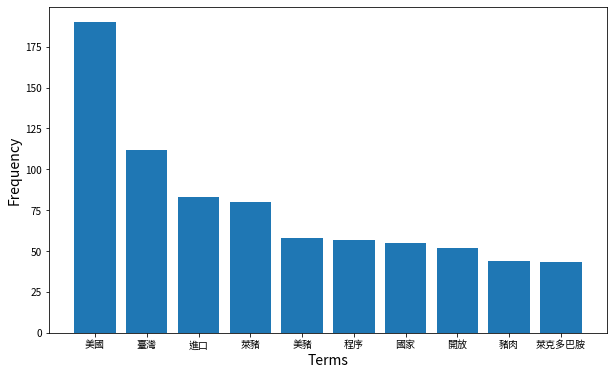

In [2]:
data01 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/prousspeech_tsai.xlsx")
data01.fillna("",inplace=True)
lmspeech_pro = list(data01['text'])
data01.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_pro = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_pro]
for idx, speech in enumerate(lmspeech_pro):
    lmspeech_pro[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_pro)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_pro)
    bag_of_words = vec.transform(lmspeech_pro)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiprous = get_top_n_words(lmspeech_pro, 10)
for word, freq in common_words_tsaiprous:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_prous_plotly = pd.DataFrame(common_words_tsaiprous, columns = ['ReviewText' , 'count'])
tsai_prous_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-U.S. legislators in Tsai era')

tsaiprous_cwdf = pd.DataFrame(common_words_tsaiprous, columns=['Terms', 'Freq.'])  
print(tsaiprous_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

prous_tsai_fig = plt.figure(figsize=(10,6))
prous_tsai_fig = plt.bar(tsaiprous_cwdf['Terms'], tsaiprous_cwdf['Freq.']) 
prous_tsai_fig = plt.xlabel('Terms', fontsize = 14)
prous_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#proim_ma_fig = plt.title("The 10 most frequent terms of pro-U.S. legislators in Tsai era", fontsize = 18)

print(prous_tsai_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.000 seconds.
Prefix dict has been built successfully.


美國 336
臺灣 229
進口 209
豬肉 171
開放 147
標示 146
美豬 142
萊豬 134
萊克多巴胺 104
政府 100


   Terms  Freq.
0     美國    336
1     臺灣    229
2     進口    209
3     豬肉    171
4     開放    147
5     標示    146
6     美豬    142
7     萊豬    134
8  萊克多巴胺    104
9     政府    100
Text(0, 0.5, 'Frequency')


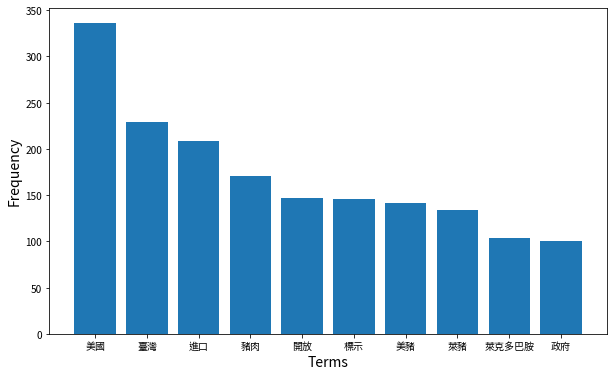

In [3]:
data02 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiusspeech_tsai.xlsx")
data02.fillna("",inplace=True)
lmspeech_anti = list(data02['text'])
data02.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_anti = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_anti]
for idx, speech in enumerate(lmspeech_anti):
    lmspeech_anti[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_anti)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_anti)
    bag_of_words = vec.transform(lmspeech_anti)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiantius = get_top_n_words(lmspeech_anti, 10)
for word, freq in common_words_tsaiantius:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_antius_plotly = pd.DataFrame(common_words_tsaiantius, columns = ['ReviewText' , 'count'])
tsai_antius_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of U.S.-skeptism legislators in Tsai era')

tsaiantius_cwdf = pd.DataFrame(common_words_tsaiantius, columns=['Terms', 'Freq.'])  
print(tsaiantius_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

antius_tsai_fig = plt.figure(figsize=(10,6))
antius_tsai_fig = plt.bar(tsaiantius_cwdf['Terms'], tsaiantius_cwdf['Freq.'])
antius_tsai_fig = plt.xlabel('Terms', fontsize = 14)
antius_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of U.S.-skeptism legislators in Tsai era", fontsize = 18)

print(antius_tsai_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.000 seconds.
Prefix dict has been built successfully.


進口 953
臺灣 704
豬肉 620
萊克多巴胺 600
美豬 551
學校 505
標示 500
瘦肉精 484
美國 465
開放 437


   Terms  Freq.
0     進口    953
1     臺灣    704
2     豬肉    620
3  萊克多巴胺    600
4     美豬    551
5     學校    505
6     標示    500
7    瘦肉精    484
8     美國    465
9     開放    437
Text(0, 0.5, 'Frequency')


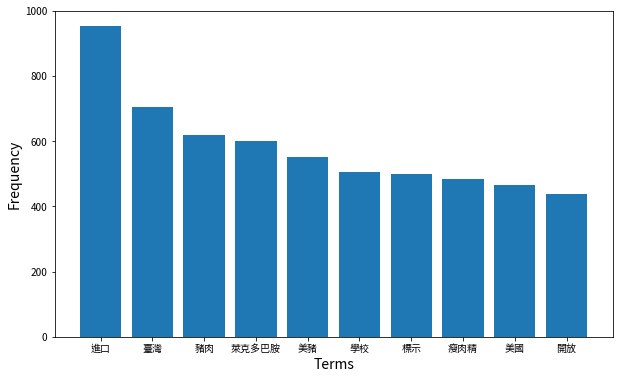

In [4]:
data03 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/dmusspeech_tsai.xlsx")
data03.fillna("",inplace=True)
lmspeech_dm = list(data03['text'])
data03.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_dm = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_dm]
for idx, speech in enumerate(lmspeech_dm):
    lmspeech_dm[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_dm)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_dm)
    bag_of_words = vec.transform(lmspeech_dm)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaidmus = get_top_n_words(lmspeech_dm, 10)
for word, freq in common_words_tsaidmus:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_dmus_plotly = pd.DataFrame(common_words_tsaidmus, columns = ['ReviewText' , 'count'])
tsai_dmus_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', 
    title='The 10 most frequent terms of unknown stance legislators in Tsai era')

tsaidmus_cwdf = pd.DataFrame(common_words_tsaidmus, columns=['Terms', 'Freq.'])  
print(tsaidmus_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

dmus_tsai_fig = plt.figure(figsize=(10,6))
dmus_tsai_fig = plt.bar(tsaidmus_cwdf['Terms'], tsaidmus_cwdf['Freq.'])
dmus_tsai_fig = plt.xlabel('Terms', fontsize = 14)
dmus_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of unknown stance legislators in Tsai era", fontsize = 18)

print(dmus_tsai_fig)

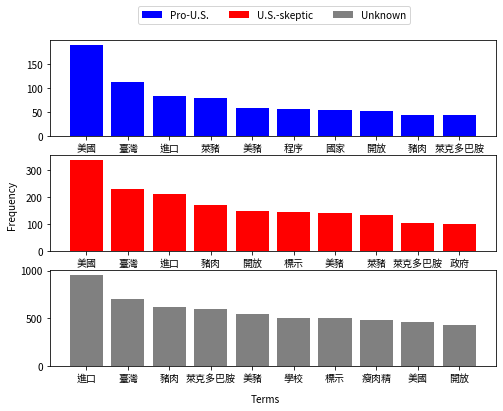

In [5]:
#Merging three figures into one
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(8,6))
plt.subplot(3, 1, 1)
prous_tsai_fig = plt.bar(tsaiprous_cwdf['Terms'], tsaiprous_cwdf['Freq.'], color = 'blue')
plt.subplot(3, 1, 2)
antius_tsai_fig = plt.bar(tsaiantius_cwdf['Terms'], tsaiantius_cwdf['Freq.'], color = 'red')
plt.subplot(3, 1, 3)
dmus_tsai_fig = plt.bar(tsaidmus_cwdf['Terms'], tsaidmus_cwdf['Freq.'], color = 'grey')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center', fontsize = 10)
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize = 10)
fig.legend(handles=[prous_tsai_fig, antius_tsai_fig, dmus_tsai_fig], labels=['Pro-U.S.', 'U.S.-skeptic', 'Unknown'], 
            bbox_to_anchor=[0.76, 0.97], ncol=3)
plt.savefig('uswordfreq_tsai.png', dpi=300)

In [6]:
#Font check
#from matplotlib import font_manager
#font_set = {f.name for f in font_manager.fontManager.ttflist}
#for f in font_set:
    #print(f)